#  Final Modeling and Analysis

## The goals of this notebook are the following:

- conclude Pre-Modeling EDA and Anaylsis and save visualizations.
- conclude Post-Modeling EDA and Analysis and save visualizations.
- conduct any other visulaizations or tests needed for presentation

In [56]:
import seaborn as sns 
import scipy.stats as scs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn import tree

In [5]:
df=pd.read_csv('Cleaned_Loan_Dataset.csv',index_col=0) #reading in dataframe

In [6]:
df.columns #columns in datset

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk',
       'F-Low Risk', 'G-Low Risk', 'H-Medium Risk', 'I-Med

# Pre Modeling EDA Visualizations for Presentation

Text(0.5, 1.0, 'How ID affects Car loan defaults')

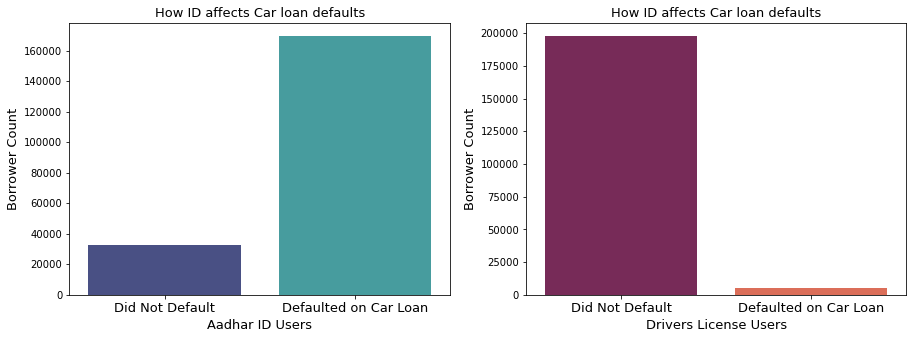

In [50]:
IDs=['Aadhar_flag', 'Driving_flag'] #based on EDA
fig,ax=plt.subplots(1,2,figsize=(15,5))
y=df.groupby('Aadhar_flag').count()['loan_default']
x=df.groupby('Aadhar_flag').count()['loan_default'].index
sns.barplot(x,y,ax=ax[0],palette='mako')
ax[0].set_xlabel('Aadhar ID Users',fontsize=13)
ax[0].set_ylabel('Borrower Count',fontsize=13)
ax[0].set_xticklabels(labels=['Did Not Default','Defaulted on Car Loan'],fontsize=13)
ax[0].set_title('How ID affects Car loan defaults',fontsize=13)
y1=df.groupby('Driving_flag').count()['loan_default']
x1=df.groupby('Driving_flag').count()['loan_default'].index
sns.barplot(x1,y1,ax=ax[1],palette='rocket')
ax[1].set_xlabel('Drivers License Users',fontsize=13)
ax[1].set_ylabel('Borrower Count',fontsize=13)
ax[1].set_xticklabels(labels=['Did Not Default','Defaulted on Car Loan'],fontsize=13)
ax[1].set_title('How ID affects Car loan defaults',fontsize=13)

In [51]:
fig.savefig('How_ID_affects_Car_loan_defaults')
#saving for presentation

In [31]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk',
       'F-Low Risk', 'G-Low Risk', 'H-Medium Risk', 'I-Med

In [40]:
y=df.loc[df['Salaried_High_CNS']==1,'loan_default'].mean()
y1=df.loc[df['Salaried_High_CNS']==0,'loan_default'].mean() 
#based on EDA 

Text(0, 0.5, 'Average Loan Default Rate')

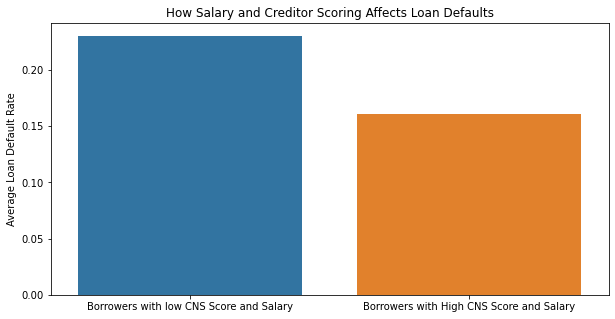

In [48]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x=['Borrowers with low CNS Score and Salary','Borrowers with High CNS Score and Salary'],y=[y1,y],ax=ax)
ax.set_title('How Salary and Creditor Scoring Affects Loan Defaults')
ax.set_ylabel('Average Loan Default Rate',fontsize=10)

In [49]:
fig.savefig('How_Salary_and_Credit_Scroing_relates_to_Car_loan_Defaults.png')

# Final Modeling and Post Analysis

In [52]:
import pickle
filename='final_model.sav' #bringing in selected model
model=pickle.load(open(filename,'rb'))

In [53]:
model

DecisionTreeClassifier(max_depth=2, max_features=5, random_state=1)

In [151]:
len(model.feature_importances_) #number of feats in final model

60

[Text(418.5, 226.5, 'X[23] <= 301754.0\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]\nclass = No Default'),
 Text(209.25, 135.9, 'X[58] <= 20.793\ngini = 0.5\nsamples = 89.6%\nvalue = [0.49, 0.51]\nclass = No Default'),
 Text(104.625, 45.29999999999998, 'gini = 0.5\nsamples = 84.6%\nvalue = [0.497, 0.503]\nclass = No Default'),
 Text(313.875, 45.29999999999998, 'gini = 0.469\nsamples = 5.0%\nvalue = [0.376, 0.624]\nclass = No Default'),
 Text(627.75, 135.9, 'X[48] <= 0.5\ngini = 0.485\nsamples = 10.4%\nvalue = [0.586, 0.414]\nclass = Default'),
 Text(523.125, 45.29999999999998, 'gini = 0.478\nsamples = 9.2%\nvalue = [0.605, 0.395]\nclass = Default'),
 Text(732.375, 45.29999999999998, 'gini = 0.495\nsamples = 1.2%\nvalue = [0.449, 0.551]\nclass = No Default')]

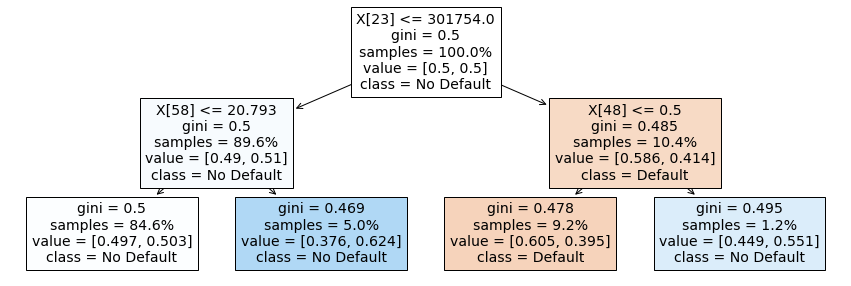

In [78]:
fig,ax=plt.subplots(figsize=(15,5)) #what model looks like
tree.plot_tree(model,filled=True,class_names=['Default','No Default'],proportion=True,ax=ax)

In [79]:
fig.savefig('Decision_Tree_Visual.png')

In [80]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk',
       'F-Low Risk', 'G-Low Risk', 'H-Medium Risk', 'I-Med

In [94]:
low=df.loc[(df['PRI.DISBURSED.AMOUNT']>302000) & (df['M-Very High Risk']==0),'loan_default'].mean()
high=df.loc[(df['PRI.DISBURSED.AMOUNT']>302000) & (df['M-Very High Risk']==1),'loan_default'].mean()

In [95]:
print(low,high) #based on model feature importance

0.15273243435060327 0.2581801882563873


Text(0.5, 1.0, 'How High Risk and Large Principal affect Car loan Defaults')

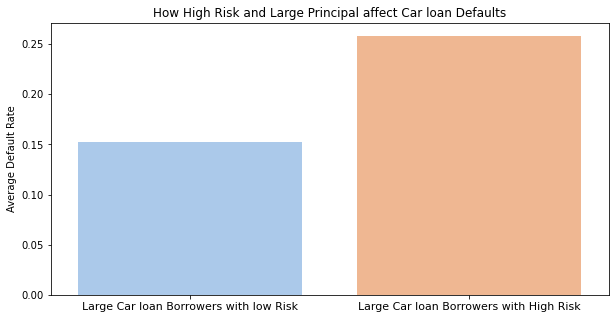

In [113]:
fig,ax=plt.subplots(figsize=(10,5))
labels=['Large Car loan Borrowers with low Risk','Large Car loan Borrowers with High Risk']
sns.barplot(x=[0,1],y=[low,high],ax=ax,palette='pastel')
ax.set_xticklabels(labels=labels,fontsize=11)
ax.set_ylabel('Average Default Rate')
ax.set_title('How High Risk and Large Principal affect Car loan Defaults')

In [114]:
fig.savefig('How_High_Risk_and_Large_Principal_affect_Car_loan_Defaults.png')

Text(0.5, 1.0, 'How Age and Delinquent Accounts Influence Loan Defaults')

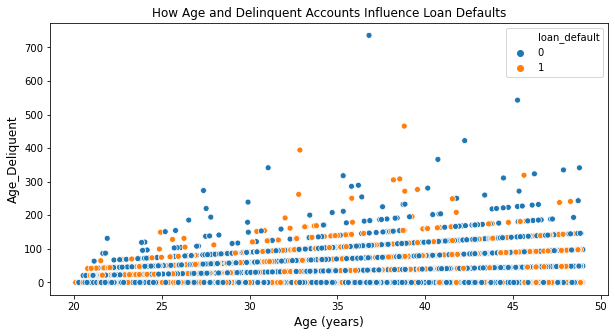

In [145]:
fig,ax=plt.subplots(figsize=(10,5))
labels=['No Default','Default']
sns.scatterplot(x=df['Age_at_disbursal'],y=df['Age_Deliquent'],hue=df.loan_default,ax=ax)
ax.set_xlabel('Age (years)',fontsize=12)
ax.set_ylabel('Age_Deliquent',fontsize=12)
ax.set_title('How Age and Delinquent Accounts Influence Loan Defaults',fontsize=12)

In [146]:
fig.savefig('How_Age_and_Delinquent_Accounts_Influence_Loan_Defaults.png')

In [152]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk',
       'F-Low Risk', 'G-Low Risk', 'H-Medium Risk', 'I-Med

In [153]:
X_test=df.drop(axis=1,labels=['Date.of.Birth','DisbursalDate','loan_default'])
Y_test=df.loan_default

In [154]:
X_test.shape #using entire dataset for metric evaluation

(202679, 60)

In [155]:
Y_test.shape

(202679,)

In [156]:
Y_preds=model.predict(X_test)

In [159]:
metrics.recall_score(Y_test,Y_preds)

0.9275437139458149

In [179]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

Confusion Matrix, without normalization
[[ 17919 140209]
 [  3228  41323]]


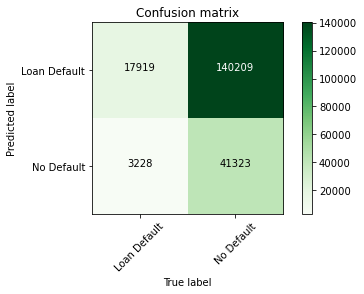

In [180]:
import itertools
classes=['Loan Default','No Default']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens)

## Thus as we can see, We did a great job of optimizing Recall. Thus, the false negatives or predicted 'good loans' where the borrower does default have been minimized. However, sas you may know, Type I and Type II Error are inversely related. Thus, Our optimization of Type II Error came at the cost of High Type I Error. In our case, I find this acceptable because I would much rather be extra cautuious and flag a lot of accounts as potential to default and be wrong a lot however I will also avoid missing defaults which is worse. If you think about it,this type of model would have been useful during the 2008 reccesion becuase we wouldn't have missed all of the actual defaults.